In [14]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], ' test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000  test samples


In [6]:
model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(Conv2D(64, 
                 (3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.8478 - acc: 0.8900 - val_loss: 0.0725 - val_acc: 0.9760
Epoch 2/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1051 - acc: 0.9708 - val_loss: 0.0486 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0754 - acc: 0.9788 - val_loss: 0.0371 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0615 - acc: 0.9825 - val_loss: 0.0403 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0511 - acc: 0.9855 - val_loss: 0.0378 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0429 - acc: 0.9875 - val_loss: 0.0393 - val_acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0404 - acc: 0.9887 - val_loss: 0.0349 - 

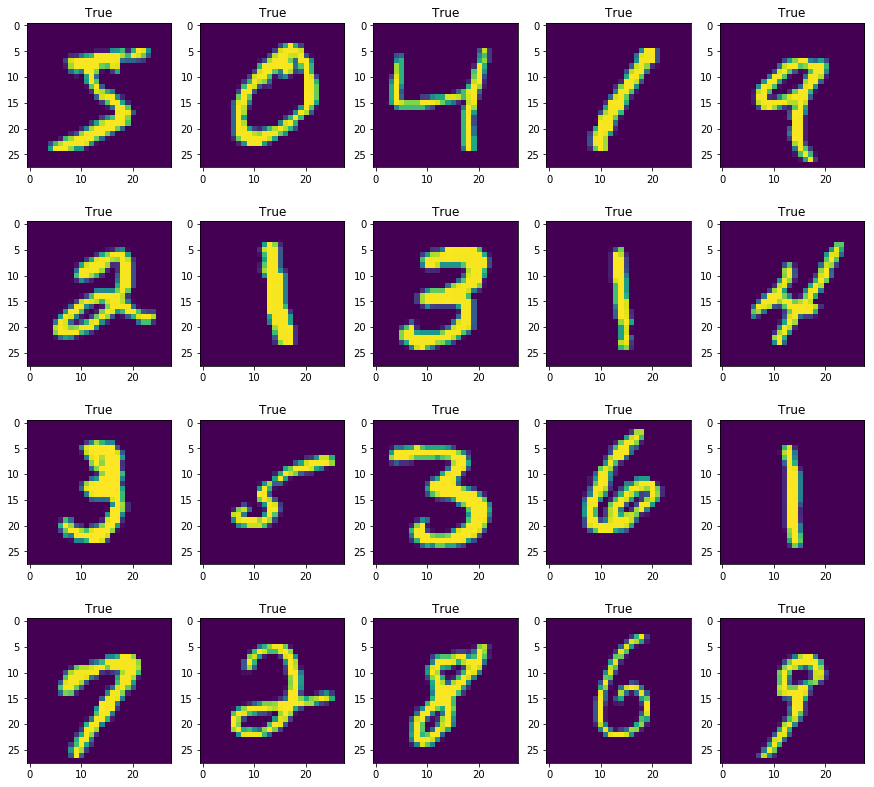

In [33]:
predictions = model.predict(x_train[:20])
plt.figure(figsize=(15,14))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(np.argmax(y_train[i])==np.argmax(predictions[i]))